## Time Series Anomaly Detection

We will use a concept known as Bollinger Bands to discover when behavior changes from what is "expected" or normal. Bollinger Bands is a volatility indicator and commonly used in stock market trading. 

Scenario: Discover anomalies in number of web pages accessed in a day by a user. Is there a bot copying the curriculum? 

We will accomplish this by breaking down to the following tasks:

1. acquire the data
2. prepare the data
3. make the analysis process (which we will discuss later) work over all users. 
4. Turn the analysis process and calculations into a function that can be used to loop through for each user. 
5. Test the function on a single user. 
6. Analyze by looping over all users. 

The analysis process will look like this, for each user: 

1. compute necessary metrics to arrive at the final metric, %b (percent-b).
2. add user id to the dataframe that contains all the metrics, including %b. 
3. filter to rows where %b indicates anomaly (i.e. > 1)
4. append rows of anomalies of new user to previous users' anomalous activity. 

Finally, we will do a quick sample of exploration of the anomalies. There is much more you can do! 

Your exercise will be to add comments, markdown, and docstrings to the code in this lesson.

- Google Slide Presentation: https://docs.google.com/presentation/d/1hLFy6cWmJ4-bVUNykEGvXWxHnCwYMuFlsU0qwzxLCw4/edit?usp=sharing

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


**Acquire**

After doing some research, some experimentation of performing actions and watching the logs, we discovered what each of the fields represent. We then parse and name the fields accordingly. 

In [4]:
# create column names for the data
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
# read the data into a pandas DataFrame
df = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
# take a quick peak at the data
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


**Data Preparation**

In [7]:
# convert 'date' to datetime, and reset to index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

In [8]:
# resample daily counts for number of page views

pages = df['endpoint'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

<AxesSubplot:xlabel='date'>

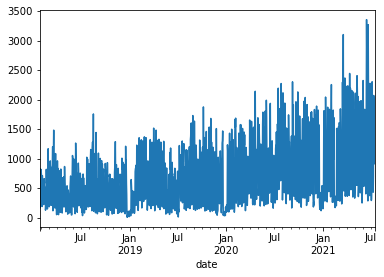

In [9]:
#plot pages
pages.plot()